# Neural Network Of ASL Letters

#### We have chosen a dataset of ASL letters with 3000 images of each letter

### Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import glob
import cv2
import os

### Import Data

In [2]:
current_dir = os.getcwd()
# Load data
def load_data(img_dir):
    data = []
    labels = []
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
    for label in classes:
        path = os.path.join(current_dir, img_dir, label, "*.jpg")
        for img_path in glob.glob(path):
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (28, 28))  # resize image to 28x28
            data.append(image)
            labels.append(classes.index(label))
    data = np.array(data)/255.0  # normalize the data to [0, 1] range
    labels = np.array(labels)
    return data, labels

In [3]:
img_dir = "images"  # assuming the dataset is stored in a directory named 'train'
data, labels = load_data(img_dir)

In [4]:
# One-hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Make sure images have shape (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

### Initialize the CNN

##### We have done this with 3 convolutional layers with the following five arguments: Filters, Kernel_size, Padding, Activation Function – Relu, and Input shape.

##### Additionally, we provide a max pooling operation to down sample the images

##### Then we Flatten the data set to convert it into a 1-D array for input into the next layer, which is fully connected using a dense class to create a fully connected layer (relu activation) and output one (softmax activation)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(29, activation='softmax')  # 29 classes for A-Z, Del, Nothing, Space
])

### Compile the model

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train The Model

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
2175/2175 [==============================] - 51s 23ms/step - loss: 0.9534 - accuracy: 0.7038 - val_loss: 0.2819 - val_accuracy: 0.9125
Epoch 2/50
2175/2175 [==============================] - 51s 24ms/step - loss: 0.1513 - accuracy: 0.9493 - val_loss: 0.1031 - val_accuracy: 0.9663
Epoch 3/50
2175/2175 [==============================] - 51s 23ms/step - loss: 0.0875 - accuracy: 0.9715 - val_loss: 0.0539 - val_accuracy: 0.9816
Epoch 4/50
2175/2175 [==============================] - 50s 23ms/step - loss: 0.0642 - accuracy: 0.9786 - val_loss: 0.0890 - val_accuracy: 0.9705
Epoch 5/50
2175/2175 [==============================] - 51s 24ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0683 - val_accuracy: 0.9780
Epoch 6/50
2175/2175 [==============================] - 51s 23ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0539 - val_accuracy: 0.9816
Epoch 7/50
2175/2175 [==============================] - 51s 24ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0448 -

#### Save the Model

In [8]:
model.save('ASL_Model_2epochs.h5')

### Evaluate the Model

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

544/544 [==============================] - 4s 7ms/step - loss: 0.0273 - accuracy: 0.9968


##### Evaluate the accuracy and loss function for both the training and test data set

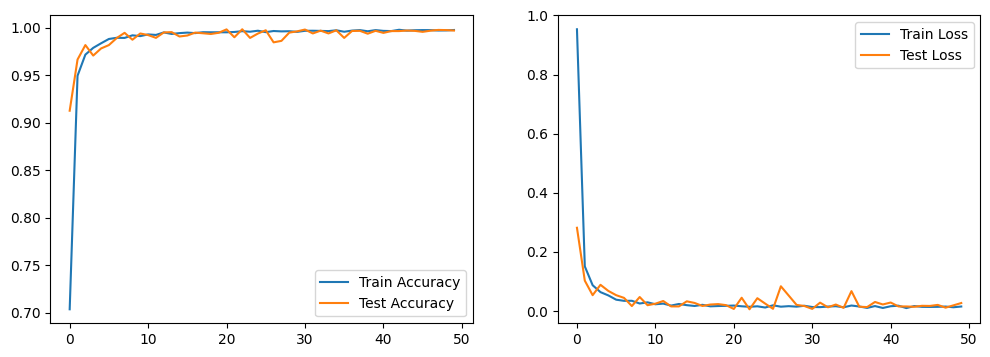

In [10]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

#### Plot The Test Results

544/544 [==============================] - 4s 8ms/step


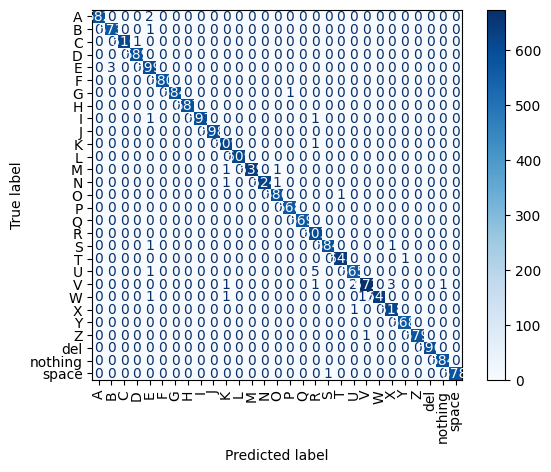

In [11]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded ground truth labels to class labels

# Assuming you have this list of class names from earlier in your code
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')  # Setting values_format to 'd' for integer formatting
plt.show()

##### As Seen the Model preforms with Incredable accurtacy and is able to recognize the majority of ASL hand signals

##### Summary of CNN's Ability to Recognize ASL Images:

##### Dataset and Subject: 
The Convolutional Neural Network (CNN) was trained on a dataset comprising images of American Sign Language (ASL) gestures.

##### High Accuracy: 
The model boasts a high performance with 99%+ accuracy on both training and test sets.

##### Consistency of Dataset: 
While the dataset was extensive, a notable limitation was that all images consisted of the same or similar background and showcased the same hand.

##### Generalization Concerns: 
Given the uniformity of the dataset, there are concerns about the model's ability to generalize its performance on new, diverse images that differ from the training set, such as different backgrounds or hand variations.

##### In essence, while the model demonstrates commendable accuracy for the specific dataset it was trained on, caution must be exercised when introducing new and varied data outside of this controlled environment.
